## Imports

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

## Explore data

In [2]:
data = pd.read_csv('segmentation data.csv', index_col=0)

In [3]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
# correlation estimate

data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


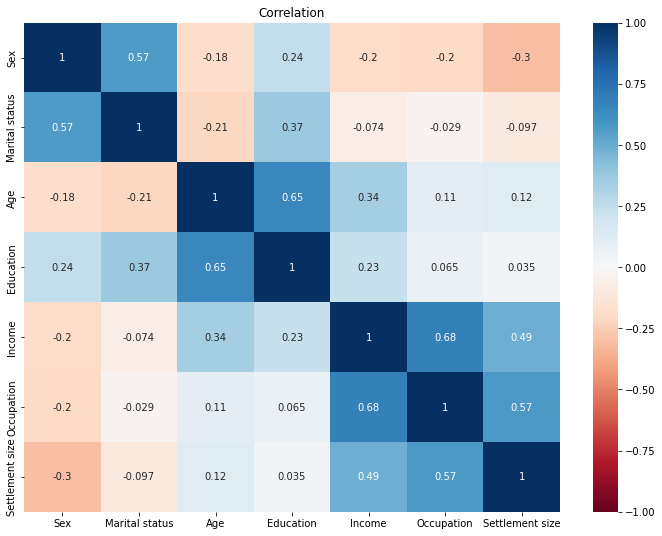

In [6]:
plt.figure(figsize=(12,9))

sns.heatmap(data.corr(),
           annot=True, cmap='RdBu', vmin=-1, vmax=1)

plt.title('Correlation')
plt.show()

## Standardization

In [7]:
scaler  = StandardScaler()

In [8]:
data_std = scaler.fit_transform(data)

In [10]:
pd.DataFrame(data_std, columns=data.columns)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


## K-means Clustering

How to choose n_clusters for KMeans?

In [14]:
scores = []

In [15]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_std)
    scores.append(kmeans.inertia_)

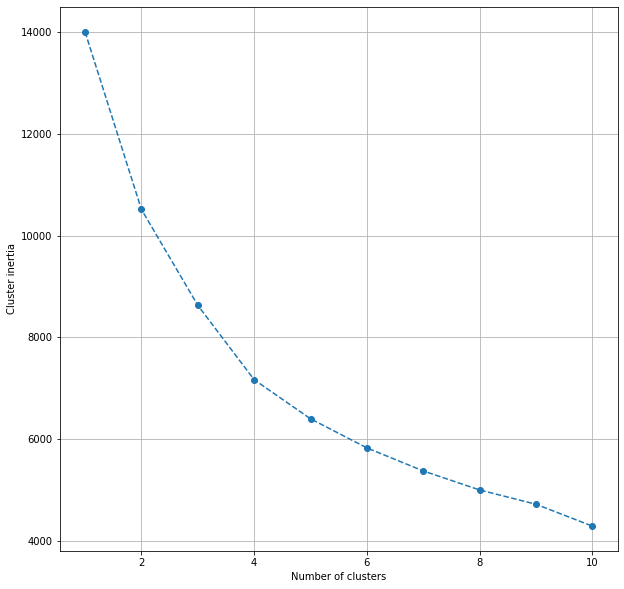

In [21]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11), scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.grid('on')
plt.show()

As a rule of thumb, based on "elbow" method we can choose 4 for n_clusters

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

kmeans.fit(data_std)

KMeans(n_clusters=4, random_state=42)

## Results

In [32]:
data_segm_kmeans = data.copy()
data_segm_kmeans['Segment K-means'] = kmeans.labels_

In [33]:
data_segm_analysis = data_segm_kmeans.groupby(['Segment K-means']).mean()

data_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


We can define specific characteristics of customer segmentation from this analysis

Customer types(segments) :

*   0: Well-of
*   1: Fewer Opportunities
*   2: Standard
*   3: Career Focused

In [31]:
# Let's add number of customers and proportion of them for each segment

In [34]:
data_segm_analysis['N Obs'] = data_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
data_segm_analysis['Proportion Obs'] = data_segm_analysis['N Obs'] / data_segm_analysis['N Obs'].sum()

In [36]:
# We can change segments into their labels which we defined before

In [38]:
data_segm_analysis = data_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunitiers',
                         2:'standard',
                         3:'career focused'})

In [39]:
data_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Proportion Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunitiers,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [40]:
data_segm_kmeans['Labels'] = data_segm_kmeans['Segment K-means'].map({0:'well-off',
                         1:'fewer-opportunitiers',
                         2:'standard',
                         3:'career focused'})

## Visualizing Segments

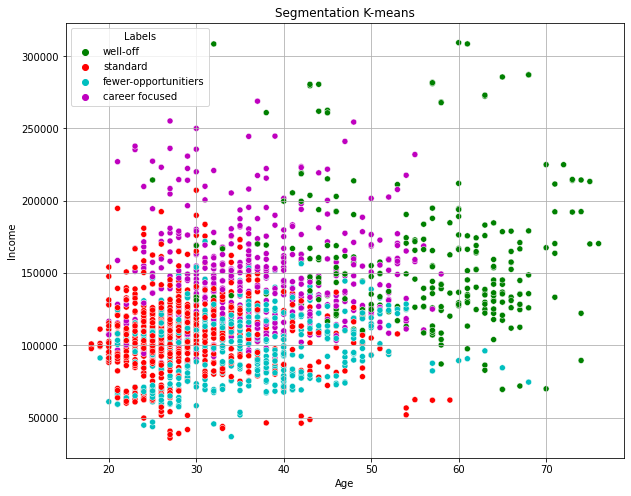

In [43]:
x_axis = data_segm_kmeans['Age']
y_axis = data_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = data_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.grid('on')
plt.show()

From this graph, we can see segmentation, but there are not in the shape of separate groups.

What about after applying PCA?